<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/model_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive to load the files

## The trained Image Classifier model has been stored on Google Drive. This enables Colab to pickup the file  

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# Import the libraries onto the Jupyter notebook
## The libraries required are the following

The ```InteractiveShell.ast_node_interactivity = 'all'``` setting ensures visibility into multiple outputs for each cell

- ```fastai``` and ```fastai.vision``` for image model building
- ```numpy``` for vector operations
- ```requests``` to get data from the web repositories
- ```os``` and ```time``` for general processing

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from fastai import *
from fastai.vision import *
import requests
import numpy as np

# Setup the directories where the model is stored

The model is stored in the ```image_dir``` folder. This needs to be loaded subsequently

In [0]:
image_dir = '/gdrive/My Drive/abv_reviews/images/'

# Load the pre-trained model

In [0]:
learn = load_learner(image_dir)

In [0]:
# sample file
url ='https://res.cloudinary.com/abillionveg/image/upload/a_exif,q_auto:best,w_640,h_640,c_fill/v1575807912/cj2rvsmnwqmvfrfznkly.jpg'


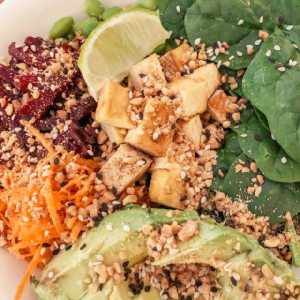

99.49% probability of review being approved 



In [8]:
# open the image and predict
open_image(requests.get(url,stream=True).raw).resize(300)
predicted_status, tensor_index, probability_tensor = learn.predict(open_image(requests.get(url,stream=True).raw))
prob = max(probability_tensor[0].item(),probability_tensor[1].item())
print('{:.2f}% probability of review being {} \n'.format(100*prob, predicted_status.obj))